In [1]:
# import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn import tree, ensemble, metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.graph_objects as go


In [2]:
# read the database
smoking_df = pd.read_csv('../data/smoking.csv')
smoking_df.head(10)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
5,5,M,30,180,75,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,0
6,6,M,40,160,60,85.5,1.0,1.0,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,1
7,7,M,45,165,90,96.0,1.2,1.0,1.0,1.0,...,15.0,1.0,1.3,38.0,71.0,111.0,Y,0,Y,0
8,9,F,50,150,60,85.0,0.7,0.8,1.0,1.0,...,13.7,1.0,0.8,31.0,31.0,14.0,Y,0,N,0
9,10,M,45,175,75,89.0,1.0,1.0,1.0,1.0,...,16.0,1.0,0.8,26.0,24.0,63.0,Y,0,N,0


In [3]:
# Dropping ID column as it is not needed
smoking_df.drop('ID',axis=1,inplace=True)

In [4]:
# Check the dataset daya types
smoking_df.dtypes

gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
smoking                  int64
dtype: object

In [5]:
# describe data set
smoking_df.describe().round(2)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,...,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00
mean,44.18,164.65,65.86,82.05,1.01,1.01,1.03,1.03,121.49,76.00,...,57.29,114.96,14.62,1.09,0.89,26.18,27.04,39.95,0.21,0.37
std,12.07,9.19,12.82,9.27,0.49,0.49,0.16,0.16,13.68,9.68,...,14.74,40.93,1.56,0.40,0.22,19.36,30.95,50.29,0.41,0.48
min,20.00,130.00,30.00,51.00,0.10,0.10,1.00,1.00,71.00,40.00,...,4.00,1.00,4.90,1.00,0.10,6.00,1.00,1.00,0.00,0.00
25%,40.00,160.00,55.00,76.00,0.80,0.80,1.00,1.00,112.00,70.00,...,47.00,92.00,13.60,1.00,0.80,19.00,15.00,17.00,0.00,0.00
50%,40.00,165.00,65.00,82.00,1.00,1.00,1.00,1.00,120.00,76.00,...,55.00,113.00,14.80,1.00,0.90,23.00,21.00,25.00,0.00,0.00
75%,55.00,170.00,75.00,88.00,1.20,1.20,1.00,1.00,130.00,82.00,...,66.00,136.00,15.80,1.00,1.00,28.00,31.00,43.00,0.00,1.00
max,85.00,190.00,135.00,129.00,9.90,9.90,2.00,2.00,240.00,146.00,...,618.00,1860.00,21.10,6.00,11.60,1311.00,2914.00,999.00,1.00,1.00


In [6]:
# check unique value
smoking_df.nunique().sort_values()

oral                     1
gender                   2
dental caries            2
tartar                   2
hearing(right)           2
hearing(left)            2
smoking                  2
Urine protein            6
height(cm)              13
age                     14
eyesight(right)         17
eyesight(left)          19
weight(kg)              22
serum creatinine        38
relaxation              95
HDL                    126
systolic               130
hemoglobin             145
AST                    219
ALT                    245
fasting blood sugar    276
Cholesterol            286
LDL                    289
triglyceride           390
Gtp                    488
waist(cm)              566
dtype: int64

In [7]:
# check null value in data
smoking_df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [8]:
# Checking Duplicate data
print(smoking_df.duplicated().sum())

11140


In [9]:
# print and remove the duplicates
print("Number of duplicate rows: ", smoking_df[smoking_df.duplicated() == True].shape[0])
print(f"Rows in original Dataframe: {smoking_df.shape[0]}")

new_smoking_df = smoking_df.drop_duplicates()

print(f"Dataframe rows after removing duplicates: {new_smoking_df.shape[0]}")

Number of duplicate rows:  11140
Rows in original Dataframe: 55692
Dataframe rows after removing duplicates: 44552


In [10]:
# check the dataset after removing duplicates
new_smoking_df.shape

(44552, 26)

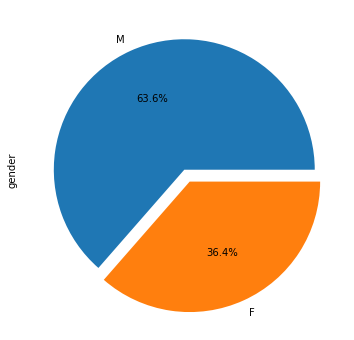

In [11]:
# visualization of gender data
smoking_df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', figsize=(6,6))

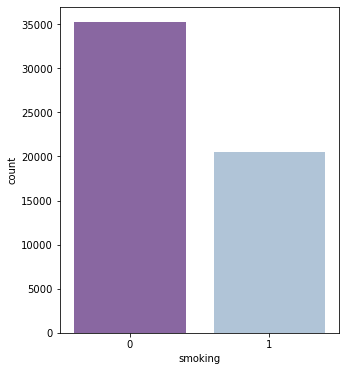

In [12]:
# visualization of gender data
# smoking_df['smoking'].value_counts().plot.bar()
plt.figure(figsize=(5,6))
plt.xlabel("smoking")
sns.countplot(data=smoking_df, x='smoking', palette='BuPu_r')
plt.show()

In [13]:
# total of non smoking and smoking
smoking_df['smoking'].value_counts()

0    35237
1    20455
Name: smoking, dtype: int64

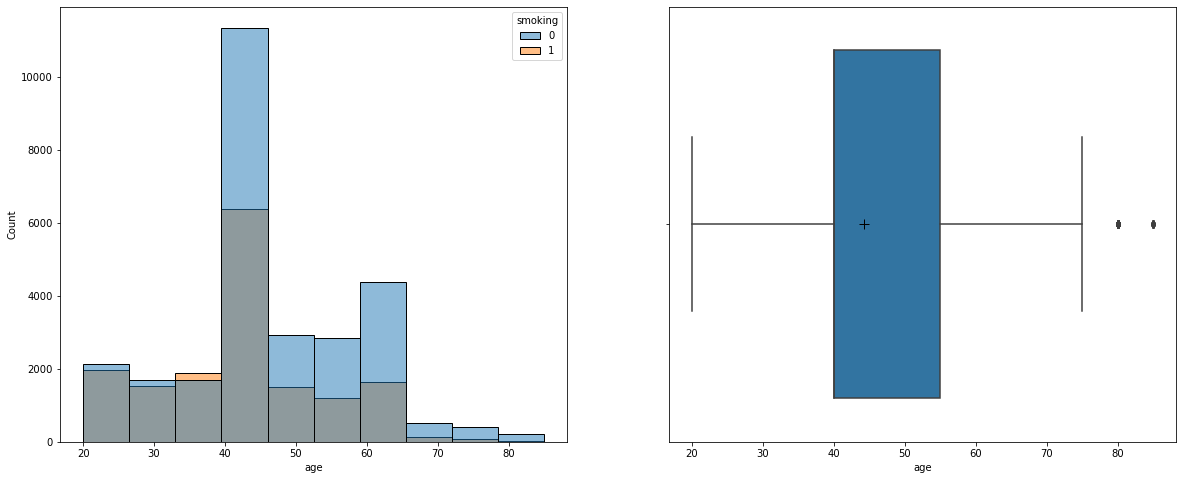

In [14]:
# Age analysys of people who smokes and not
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.histplot(data=new_smoking_df, x="age",hue="smoking", bins=10, ax=ax[0])
sns.boxplot(data=new_smoking_df, x="age", ax=ax[1], showmeans=True,
            meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})


plt.show()

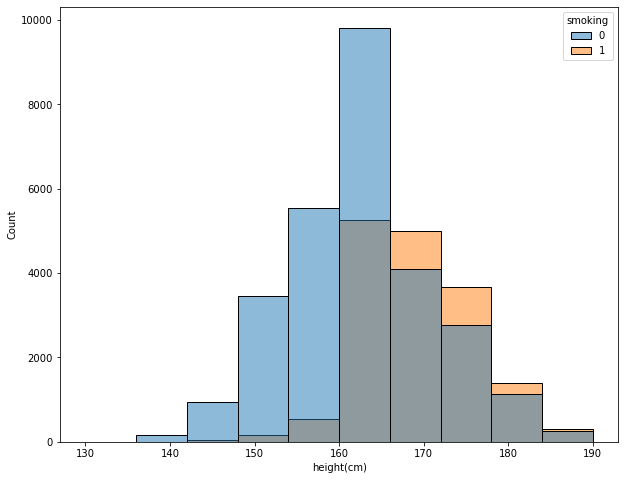

In [15]:
# height analysys of people who smokes and not
plt.figure(figsize=(10, 8))

sns.histplot(data=new_smoking_df, x="height(cm)", hue="smoking", bins=10)

plt.show()

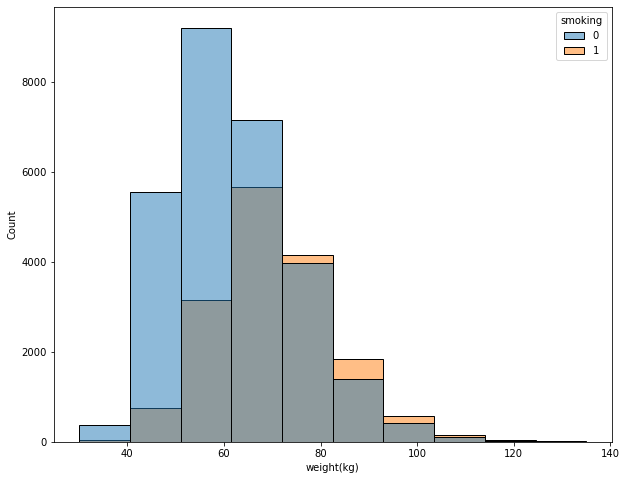

In [16]:
# weight analysys of people who smokes and not
plt.figure(figsize=(10, 8))

sns.histplot(data=new_smoking_df, x="weight(kg)", hue="smoking", bins=10)

plt.show()

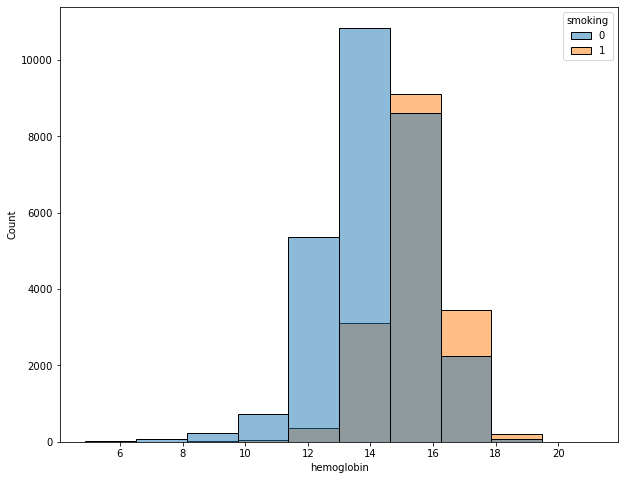

In [17]:
# hemoglobin analysys of people who smokes and not
plt.figure(figsize=(10, 8))

sns.histplot(data=new_smoking_df, x="hemoglobin", hue="smoking", bins=10)

plt.show()

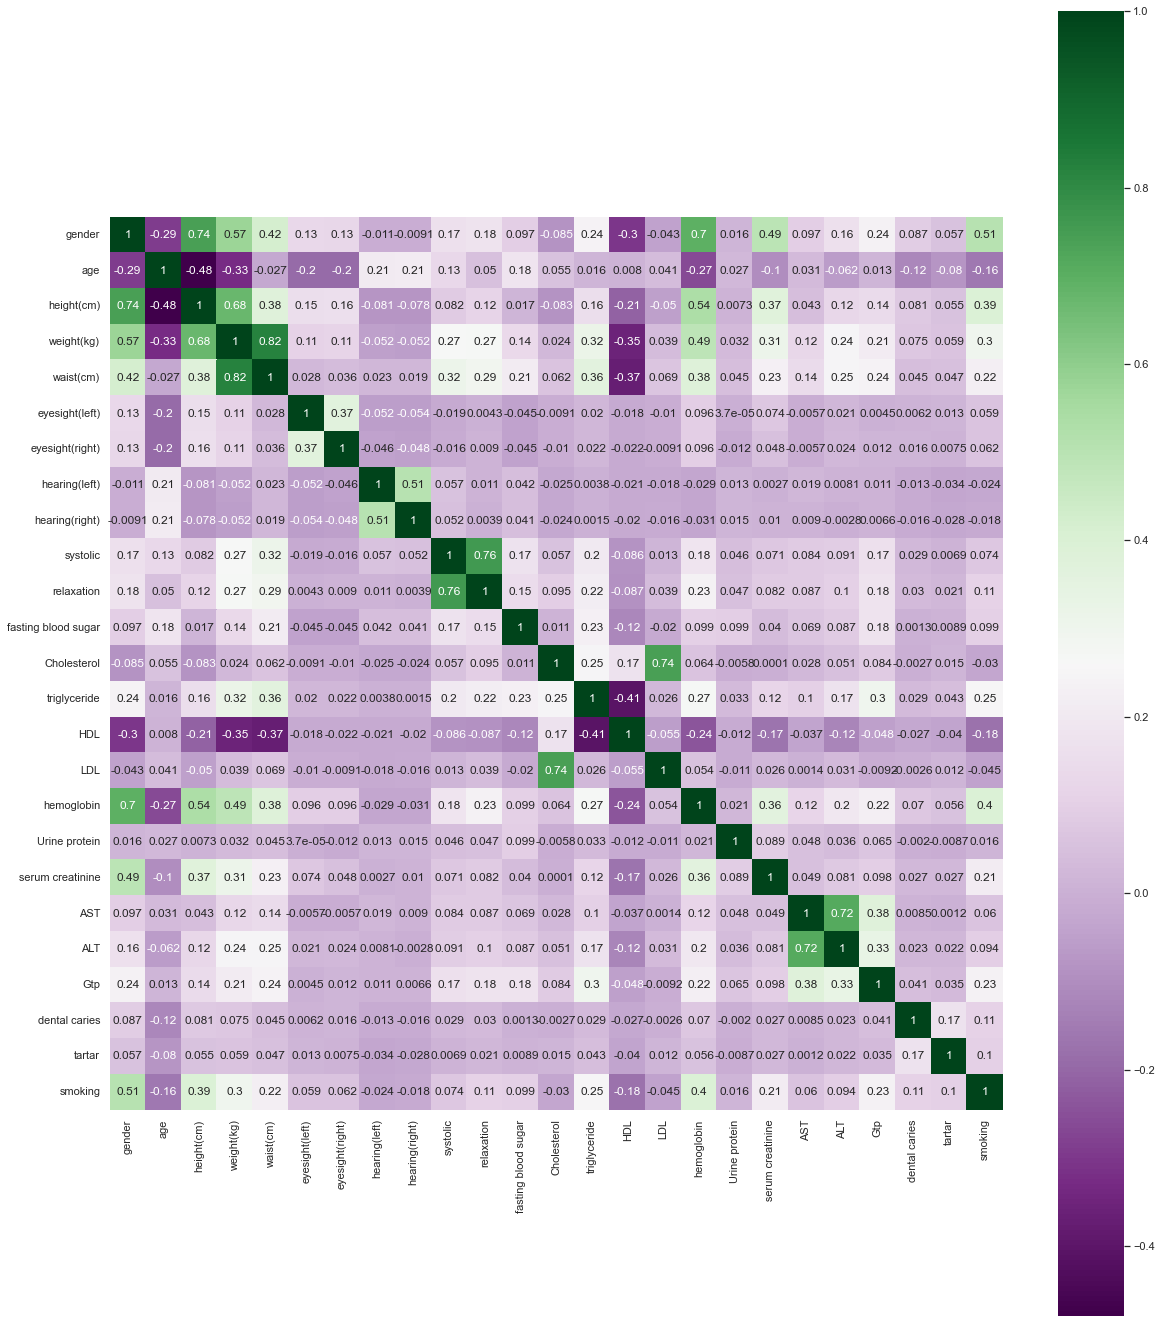

In [73]:
# heatmap of correlation between the dataset
sns.set(rc={"figure.figsize":(20, 24)})
sns.heatmap(new_smoking_df.corr(), annot=True, square=True, cmap='PRGn')

In [19]:
# check the non number / categorical value on the dataset
new_smoking_df.select_dtypes('object')

,gender,oral,tartar
0,F,Y,Y
1,F,Y,Y
2,M,Y,N
3,M,Y,Y
4,F,Y,N
...,...,...,...
44548,M,Y,Y
44549,M,Y,Y
44550,M,Y,Y
44551,M,Y,Y


In [20]:
# Change the categorical / non number value itu number so machine learning can understand it (line 112 to 117)
new_smoking_df['gender'] = new_smoking_df['gender'].str.replace('F','0')
new_smoking_df['gender'] = new_smoking_df['gender'].str.replace('M','1')

C:\Users\timn\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [21]:
new_smoking_df['gender'] = pd.to_numeric(new_smoking_df['gender'])

In [22]:
new_smoking_df['tartar'] = new_smoking_df['tartar'].str.replace('N','0')
new_smoking_df['tartar'] = new_smoking_df['tartar'].str.replace('Y','1')

In [23]:
new_smoking_df['tartar'] = pd.to_numeric(new_smoking_df['tartar'])

In [24]:
new_smoking_df['oral'] = new_smoking_df['oral'].str.replace('N','0')
new_smoking_df['oral'] = new_smoking_df['oral'].str.replace('Y','1')

In [25]:
new_smoking_df['oral'] = pd.to_numeric(new_smoking_df['oral'])

In [26]:
# Dropping ID column as it is not needed (all value is pointing to 1 so its redundant)
new_smoking_df.drop('oral',axis=1,inplace=True)

C:\Users\timn\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
# displaying new_smoking dataframe
new_smoking_df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,1,50,170,65,88.0,1.2,1.2,1.0,1.0,148.0,...,108.0,15.2,1.0,1.0,45.0,49.0,51.0,0,1,0
44549,1,35,175,70,84.0,0.6,0.7,1.0,1.0,105.0,...,118.0,15.2,1.0,0.9,20.0,14.0,16.0,0,1,0
44550,1,35,175,70,70.9,1.5,1.5,1.0,1.0,116.0,...,92.0,13.4,1.0,1.0,18.0,19.0,10.0,0,1,0
44551,1,50,165,90,106.8,0.8,0.5,1.0,1.0,122.0,...,104.0,14.5,1.0,0.9,30.0,49.0,40.0,0,1,1


In [28]:
# check the new_smoking_df dataframe to make sure all column calues are in numbers(int / float)
new_smoking_df.dtypes

gender                   int64
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
dental caries            int64
tartar                   int64
smoking                  int64
dtype: object

In [29]:
# Split our preprocessed data into our features and target arrays
y = new_smoking_df["smoking"]
X = new_smoking_df.drop(["smoking"],axis = 1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
# Create a StandardScaler instances
# scaler = StandardScaler()

# # Fit the StandardScaler
# X_scaler = scaler.fit(X_train)

# # Scale the data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [31]:
# Decision tree Classifier test
DTC = DecisionTreeClassifier(max_depth=15, min_samples_split=50, min_samples_leaf=10)
DTC.fit(X_train, y_train)

DTC_y_pred = DTC.predict(X_test)

DTC_cm = confusion_matrix(y_test, DTC_y_pred)
DTC_cm_df = pd.DataFrame(
    DTC_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Score the X-train with y-train is : ", DTC.score(X_train,y_train))
print("Score the X-test  with y-test  is : ", DTC.score(X_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,DTC_y_pred)*100)
DTCv = accuracy_score(y_test,DTC_y_pred)
print("Confusion Matrix :")
display(DTC_cm_df)
print("Classification Report :")
print(classification_report(y_test, DTC_y_pred))

Score the X-train with y-train is :  0.8133117854791405
Score the X-test  with y-test  is :  0.7188005027832645
Accuracy Score : 71.88005027832645
Confusion Matrix :


,Predicted 0,Predicted 1
Actual 0,5536,1537
Actual 1,1595,2470


Classification Report :
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      7073
           1       0.62      0.61      0.61      4065

    accuracy                           0.72     11138
   macro avg       0.70      0.70      0.70     11138
weighted avg       0.72      0.72      0.72     11138



In [32]:
# decision tree classifier test 2
tree_classifier = tree.DecisionTreeClassifier(max_depth=15, min_samples_split=50, min_samples_leaf=10).fit(X_train, y_train)
print(f"Accuracy for selected tree model: {metrics.accuracy_score(y_test, tree_classifier.predict(X_test))}")

Accuracy for selected tree model: 0.7196085473154965


In [33]:
# Random Forest Classifier test
RFC = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=5, min_samples_leaf=45)
RFC.fit(X_train, y_train)
 
RFC_y_pred = RFC.predict(X_test)

RFC_cm = confusion_matrix(y_test, RFC_y_pred)
RFC_cm_df = pd.DataFrame(
    RFC_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Score the X-train with y-train is : ", RFC.score(X_train,y_train))
print("Score the X-test  with y-test  is : ", RFC.score(X_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,RFC_y_pred)*100)
RFCv = accuracy_score(y_test,RFC_y_pred)
print("Confusion Matrix :")
display(RFC_cm_df)
print("Classification Report :")
print(classification_report(y_test, RFC_y_pred))

Score the X-train with y-train is :  0.7911354522056623
Score the X-test  with y-test  is :  0.7603699048303106
Accuracy Score : 76.03699048303106
Confusion Matrix :


,Predicted 0,Predicted 1
Actual 0,5593,1480
Actual 1,1189,2876


Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      7073
           1       0.66      0.71      0.68      4065

    accuracy                           0.76     11138
   macro avg       0.74      0.75      0.75     11138
weighted avg       0.76      0.76      0.76     11138



In [34]:
# Train an XGBoost classifier
XGB = XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.1)
XGB.fit(X_train, y_train)

XGB_y_pred = XGB.predict(X_test)

XGB_cm = confusion_matrix(y_test, XGB_y_pred)
XGB_cm_df = pd.DataFrame(
    XGB_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Score the X-train with y-train is : ", XGB.score(X_train,y_train))
print("Score the X-test  with y-test  is : ", XGB.score(X_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,XGB_y_pred)*100)
XGBv = accuracy_score(y_test,XGB_y_pred)
print("Confusion Matrix :")
display(XGB_cm_df)
print("Classification Report :")
print(classification_report(y_test, XGB_y_pred))

Score the X-train with y-train is :  0.7729993415933442
Score the X-test  with y-test  is :  0.761716645717364
Accuracy Score : 76.1716645717364
Confusion Matrix :


,Predicted 0,Predicted 1
Actual 0,5562,1511
Actual 1,1143,2922


Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      7073
           1       0.66      0.72      0.69      4065

    accuracy                           0.76     11138
   macro avg       0.74      0.75      0.75     11138
weighted avg       0.77      0.76      0.76     11138



In [35]:
# Train an Gradientboosting classifier

GB = GradientBoostingClassifier(max_depth=3, n_estimators=100, learning_rate=0.1)
GB.fit(X_train, y_train)

GB_y_pred = GB.predict(X_test)

GB_cm = confusion_matrix(y_test, GB_y_pred)
GB_cm_df = pd.DataFrame(
    GB_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Score the X-train with y-train is : ", GB.score(X_train,y_train))
print("Score the X-test  with y-test  is : ", GB.score(X_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,GB_y_pred)*100)
GBv = accuracy_score(y_test,GB_y_pred)
print("Confusion Matrix :")
display(GB_cm_df)
print("Classification Report :")
print(classification_report(y_test, GB_y_pred))

Score the X-train with y-train is :  0.7712934698030766
Score the X-test  with y-test  is :  0.762524690249596
Accuracy Score : 76.2524690249596
Confusion Matrix :


,Predicted 0,Predicted 1
Actual 0,5591,1482
Actual 1,1163,2902


Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      7073
           1       0.66      0.71      0.69      4065

    accuracy                           0.76     11138
   macro avg       0.74      0.75      0.75     11138
weighted avg       0.77      0.76      0.76     11138



In [36]:
# Train an Logistic Regression classifier
# classifier = LogisticRegression(solver='lbfgs',max_iter=200,random_state=1)
LG = LogisticRegression(solver='lbfgs',max_iter=200,random_state=1)
LG.fit(X_train, y_train)

LG_y_pred = LG.predict(X_test)

LG_cm = confusion_matrix(y_test, LG_y_pred)
LG_cm_df = pd.DataFrame(
    LG_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Score the X-train with y-train is : ", LG.score(X_train,y_train))
print("Score the X-test  with y-test  is : ", LG.score(X_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,LG_y_pred)*100)
LGv = accuracy_score(y_test,LG_y_pred)
print("Confusion Matrix :")
display(LG_cm_df)
print("Classification Report :")
print(classification_report(y_test, LG_y_pred))

Score the X-train with y-train is :  0.7313401568204944
Score the X-test  with y-test  is :  0.7396300951696894
Accuracy Score : 73.96300951696894
Confusion Matrix :


C:\Users\timn\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,Predicted 0,Predicted 1
Actual 0,5607,1466
Actual 1,1434,2631


Classification Report :
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      7073
           1       0.64      0.65      0.64      4065

    accuracy                           0.74     11138
   macro avg       0.72      0.72      0.72     11138
weighted avg       0.74      0.74      0.74     11138



In [37]:
# create a dictinary of all ML models
dic = {'logistic Regression':LGv, 'Decision Tree Classifier':DTCv, 'Random Forest Classifier':RFCv, 'XGBoost':XGBv, 'GradientBoosting':GBv }

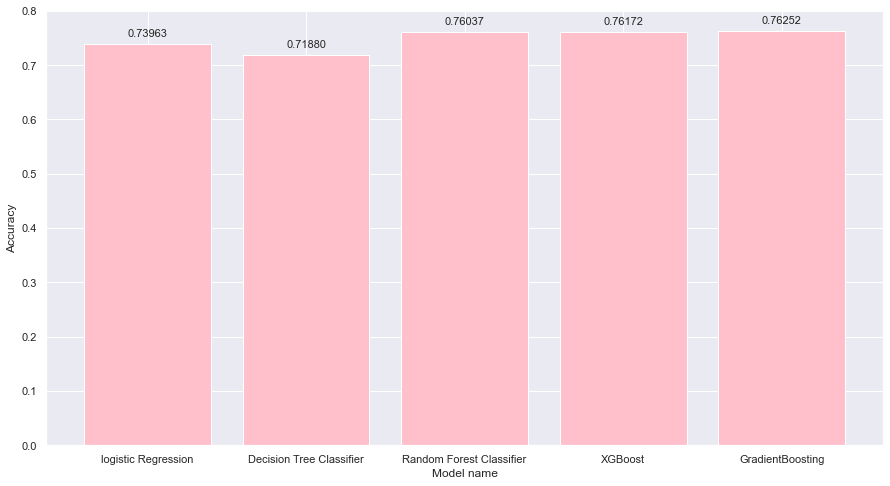

In [38]:
# Visualize all ML model accuracy score results
names = list(dic.keys())
values = list(dic.values())
plt.rc('font', size=20)

plt.figure(figsize=(15,8))
plt.xlabel('Model name')
plt.ylabel('Accuracy')

bars = plt.bar(range(len(dic)), values, tick_label=names,color='pink')
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.5f}', ha='center', va='bottom', fontsize=11)

plt.show()

In [39]:
from sklearn.feature_selection import SelectKBest, f_classif
fs = SelectKBest(score_func=f_classif, k=10)
X_train_new = fs.fit_transform(X_train, y_train)

mask = fs.get_support(indices=True)

print("10 best features: ")
for i, col in enumerate(X_train.columns[mask]):
    print("✅ ", col)

10 best features: 
✅  gender
✅  age
✅  height(cm)
✅  weight(kg)
✅  waist(cm)
✅  triglyceride
✅  HDL
✅  hemoglobin
✅  serum creatinine
✅  Gtp


In [40]:
# Split our preprocessed data into our features and target arrays
features = ['age','gender','height(cm)','weight(kg)','systolic','hemoglobin','triglyceride','HDL','serum creatinine','Gtp','smoking']
X2 = new_smoking_df[features]
y2 = new_smoking_df['smoking']
X2.shape, y2.shape

((44552, 11), (44552,))

In [41]:
# Split our preprocessed data into our features and target arrays
y2 = new_smoking_df['smoking']
X2 = X2.drop(["smoking"],axis = 1)

# Split the preprocessed data into a training and testing dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)

In [42]:
# RE-Train an Gradientboosting classifier

GB2 = GradientBoostingClassifier(max_depth=3, n_estimators=100, learning_rate=0.1)
GB2.fit(X_train2, y_train2)

GB_y_pred2 = GB2.predict(X_test2)

GB_cm2 = confusion_matrix(y_test2, GB_y_pred2)
GB_cm_df2 = pd.DataFrame(
    GB_cm2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Score the X-train with y-train is : ", GB2.score(X_train2,y_train2))
print("Score the X-test  with y-test  is : ", GB2.score(X_test2,y_test2))
print("Accuracy Score :",accuracy_score(y_test2,GB_y_pred2)*100)
GBv2 = accuracy_score(y_test2,GB_y_pred2)
print("Confusion Matrix :")
display(GB_cm_df2)
print("Classification Report :")
print(classification_report(y_test2, GB_y_pred2))

Score the X-train with y-train is :  0.7591428742443287
Score the X-test  with y-test  is :  0.753636200395044
Accuracy Score : 75.3636200395044
Confusion Matrix :


,Predicted 0,Predicted 1
Actual 0,5545,1528
Actual 1,1216,2849


Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      7073
           1       0.65      0.70      0.67      4065

    accuracy                           0.75     11138
   macro avg       0.74      0.74      0.74     11138
weighted avg       0.76      0.75      0.76     11138



In [43]:
# RE-train Random Forest Classifier test
RFC2 = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=5, min_samples_leaf=45)
RFC2.fit(X_train2, y_train2)
 
RFC_y_pred2 = RFC2.predict(X_test2)

RFC_cm2 = confusion_matrix(y_test2, RFC_y_pred2)
RFC_cm_df2 = pd.DataFrame(
    RFC_cm2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Score the X-train with y-train is : ", RFC2.score(X_train2,y_train2))
print("Score the X-test  with y-test  is : ", RFC2.score(X_test2,y_test2))
print("Accuracy Score :",accuracy_score(y_test2,RFC_y_pred2)*100)
RFCv2 = accuracy_score(y_test2,RFC_y_pred2)
print("Confusion Matrix :")
display(RFC_cm_df2)
print("Classification Report :")
print(classification_report(y_test2, RFC_y_pred2))

Score the X-train with y-train is :  0.7750643442868259
Score the X-test  with y-test  is :  0.7526485904112049
Accuracy Score : 75.26485904112049
Confusion Matrix :


,Predicted 0,Predicted 1
Actual 0,5527,1546
Actual 1,1209,2856


Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      7073
           1       0.65      0.70      0.67      4065

    accuracy                           0.75     11138
   macro avg       0.73      0.74      0.74     11138
weighted avg       0.76      0.75      0.75     11138



In [44]:
# RE-train Logistic Regression test
LG2 = LogisticRegression(solver='lbfgs',max_iter=200,random_state=1)
LG2.fit(X_train2, y_train2)

LG_y_pred2 = LG2.predict(X_test2)

LG_cm2 = confusion_matrix(y_test2, LG_y_pred2)
LG_cm_df2 = pd.DataFrame(
    LG_cm2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Score the X-train with y-train is : ", LG2.score(X_train2,y_train2))
print("Score the X-test  with y-test  is : ", LG2.score(X_test2,y_test2))
print("Accuracy Score :",accuracy_score(y_test2,LG_y_pred2)*100)
LGv2 = accuracy_score(y_test2,LG_y_pred2)
print("Confusion Matrix :")
display(LG_cm_df2)
print("Classification Report :")
print(classification_report(y_test2, LG_y_pred2))

Score the X-train with y-train is :  0.7333153767881726
Score the X-test  with y-test  is :  0.7349613934279045
Accuracy Score : 73.49613934279044
Confusion Matrix :


C:\Users\timn\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,Predicted 0,Predicted 1
Actual 0,5354,1719
Actual 1,1233,2832


Classification Report :
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      7073
           1       0.62      0.70      0.66      4065

    accuracy                           0.73     11138
   macro avg       0.72      0.73      0.72     11138
weighted avg       0.74      0.73      0.74     11138



In [45]:
LGv2

0.7349613934279045

In [46]:
# RE-Train an XGBoost classifier
XGB2 = XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.1)
XGB2.fit(X_train2, y_train2)

XGB_y_pred2 = XGB2.predict(X_test2)

XGB_cm2 = confusion_matrix(y_test2, XGB_y_pred2)
XGB_cm_df2 = pd.DataFrame(
    XGB_cm2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Score the X-train with y-train is : ", XGB2.score(X_train2,y_train2))
print("Score the X-test  with y-test  is : ", XGB2.score(X_test2,y_test2))
print("Accuracy Score :",accuracy_score(y_test2,XGB_y_pred2)*100)
XGBv2 = accuracy_score(y_test2,XGB_y_pred2)
print("Confusion Matrix :")
display(XGB_cm_df2)
print("Classification Report :")
print(classification_report(y_test2, XGB_y_pred2))

Score the X-train with y-train is :  0.758484467588436
Score the X-test  with y-test  is :  0.7546238103788832
Accuracy Score : 75.46238103788832
Confusion Matrix :


,Predicted 0,Predicted 1
Actual 0,5518,1555
Actual 1,1178,2887


Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      7073
           1       0.65      0.71      0.68      4065

    accuracy                           0.75     11138
   macro avg       0.74      0.75      0.74     11138
weighted avg       0.76      0.75      0.76     11138



In [47]:
# Decision tree Classifier test
DTC2 = DecisionTreeClassifier(max_depth=15, min_samples_split=50, min_samples_leaf=10)
DTC2.fit(X_train2, y_train2)

DTC_y_pred2 = DTC2.predict(X_test2)

DTC_cm2 = confusion_matrix(y_test2, DTC_y_pred2)
DTC_cm_df2 = pd.DataFrame(
    DTC_cm2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Score the X-train with y-train is : ", DTC2.score(X_train2,y_train2))
print("Score the X-test  with y-test  is : ", DTC2.score(X_test2,y_test2))
print("Accuracy Score :",accuracy_score(y_test2,DTC_y_pred2)*100)
DTCv2 = accuracy_score(y_test2,DTC_y_pred2)
print("Confusion Matrix :")
display(DTC_cm_df2)
print("Classification Report :")
print(classification_report(y_test2, DTC_y_pred2))

Score the X-train with y-train is :  0.7919734243131622
Score the X-test  with y-test  is :  0.7264320344765667
Accuracy Score : 72.64320344765667
Confusion Matrix :


,Predicted 0,Predicted 1
Actual 0,5559,1514
Actual 1,1533,2532


Classification Report :
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      7073
           1       0.63      0.62      0.62      4065

    accuracy                           0.73     11138
   macro avg       0.70      0.70      0.70     11138
weighted avg       0.73      0.73      0.73     11138



In [48]:
# create a dictinary 2 of all ML models
dic2 = {'logistic Regression':LGv2, 'Decision Tree Classifier':DTCv2, 'Random Forest Classifier':RFCv2, 'XGBoost':XGBv2, 'GradientBoosting':GBv2 }

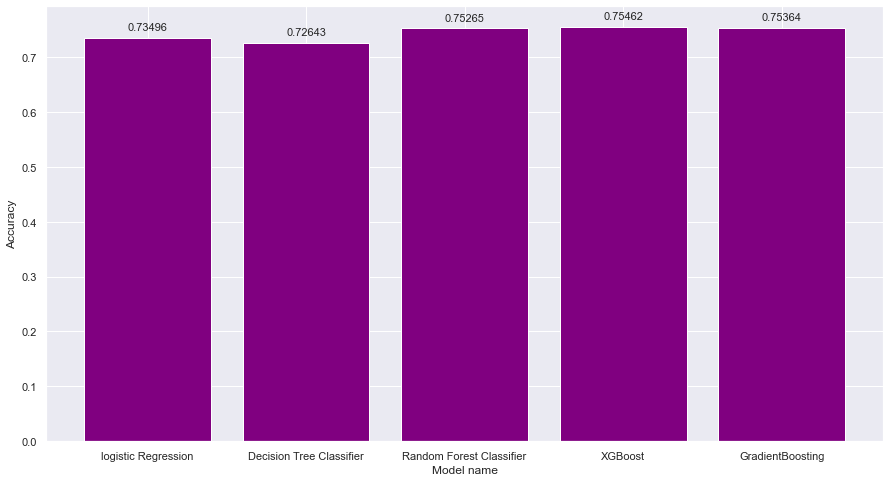

In [49]:
# Visualize all ML model accuracy score results after re-training the data
names2 = list(dic2.keys())
values2 = list(dic2.values())
plt.rc('font', size=20)

plt.figure(figsize=(15,8))
plt.xlabel('Model name')
plt.ylabel('Accuracy')

bars = plt.bar(range(len(dic2)), values2, tick_label=names,color='purple')
for bar, value2 in zip(bars, values2):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value2:.5f}', ha='center', va='bottom', fontsize=11)

plt.show()

# # Re-Visualize all ML model accuracy score results
# names2 = list(dic2.keys())
# values2 = list(dic2.values())
# plt.rc('font', size=20)

# plt.figure(figsize=(15,8))
# plt.xlabel('Model name')
# plt.ylabel('Accuracy')

# bars = plt.bar(range(len(dic2)), values2, tick_label=names2,color='purple')
# for bar, value2 in zip(bars, values2):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value2:.5f}', ha='center', va='bottom', fontsize=11)

# plt.show()

In [50]:
# Fit random forest model for classification
# rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=5, min_samples_leaf=45)
# rf_model.fit(X_train, y_train)

# # Predict probabilities of smoking status
# y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [51]:
# Based on new re-train model, for demo purposes, we still decided to stcisk with Gradient bossting model as the accuracy socre is not much different.
GB_model = GradientBoostingClassifier(max_depth=3, n_estimators=100, learning_rate=0.1)
GB_model.fit(X_train2, y_train2)

# Predict probabilities of smoking status
y_prob_rf = GB_model.predict_proba(X_test2)[:, 1]

In [52]:
print(y_prob_rf)

[0.36192462 0.5441057  0.50756148 ... 0.76086053 0.73732132 0.02521873]


In [53]:
# Define the thresholds
thresholds = [0.0, 0.4, 0.7, 1.0]
# Get the predicted probabilities for the test set
y_prob_rf = GB_model.predict_proba(X_test2)[:, 1]
print(y_prob_rf)
# Categorize the predicted probabilities based on the thresholds
y_cat_rf = np.digitize(y_prob_rf, thresholds)
print(y_cat_rf)
# Subtract 1 from the categories to make them start from 0
y_cat_rf -= 1
print(y_cat_rf)

[0.36192462 0.5441057  0.50756148 ... 0.76086053 0.73732132 0.02521873]
[1 2 2 ... 3 3 1]
[0 1 1 ... 2 2 0]


In [54]:
set(np.digitize(y_prob_rf, thresholds))

{1, 2, 3}

In [55]:
set(y_cat_rf)

{0, 1, 2}

In [56]:
# Create a dictionary that contains both the model and the predicted categories
model_dict = {'model': GB_model, 'categories': y_cat_rf}

In [57]:
model_dict

{'model': GradientBoostingClassifier(),
 'categories': array([0, 1, 1, ..., 2, 2, 0], dtype=int64)}

In [58]:
# Save the dictionary to a .joblib file
from joblib import dump
# https://scikit-learn.org/stable/model_persistence.html
dump(model_dict, '../model3.joblib')

['../model3.joblib']

In [59]:
# X_test2['smoking_category'] = y_cat_rf

In [60]:
# X_test2

,age,gender,height(cm),weight(kg),systolic,hemoglobin,triglyceride,HDL,serum creatinine,Gtp,smoking_category
34511,25,1,170,50,126.0,15.6,48.0,79.0,0.9,9.0,0
37715,40,1,170,60,90.0,16.9,81.0,40.0,1.2,22.0,1
21228,65,1,170,65,116.0,14.0,257.0,49.0,1.4,40.0,1
34014,50,1,160,55,138.0,14.9,75.0,69.0,1.0,24.0,1
34767,55,0,160,65,134.0,14.5,77.0,70.0,0.9,22.0,0
...,...,...,...,...,...,...,...,...,...,...,...
12788,45,0,155,55,110.0,15.2,73.0,62.0,0.6,24.0,0
17255,65,0,150,50,145.0,13.5,152.0,43.0,0.8,19.0,0
23627,45,1,170,60,120.0,15.6,159.0,52.0,0.9,79.0,2
33325,45,1,165,65,120.0,17.3,79.0,64.0,1.0,131.0,2


In [63]:
# rows_with_category_2 = X_test2[X_test2['smoking_category'] == 2]
# rows_with_category_2.tail(20)

,age,gender,height(cm),weight(kg),systolic,hemoglobin,triglyceride,HDL,serum creatinine,Gtp,smoking_category
34875,50,1,170,60,140.0,18.7,337.0,49.0,1.1,308.0,2
40120,40,1,170,65,115.0,16.8,237.0,39.0,0.8,25.0,2
10134,40,1,175,80,120.0,16.1,265.0,53.0,0.9,33.0,2
27156,50,1,165,75,128.0,16.1,274.0,52.0,1.1,74.0,2
43219,40,1,175,70,120.0,16.0,245.0,66.0,1.0,28.0,2
7643,40,1,170,80,136.0,16.6,306.0,57.0,1.0,118.0,2
22095,50,1,170,70,138.0,16.1,360.0,46.0,1.0,67.0,2
33469,40,1,175,70,100.0,14.6,211.0,53.0,0.9,29.0,2
3033,40,1,175,70,132.0,16.4,265.0,38.0,0.7,78.0,2
13754,45,1,170,60,119.0,15.3,133.0,46.0,1.4,56.0,2


In [60]:
# let try to remove outliers and scaled the data evenmore to see if we can improve the machine learning
from scipy import stats

df_filter = new_smoking_df[np.abs(stats.zscore(new_smoking_df) < 3).all(axis=1)]
df_filter

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0
5,1,30,180,75,85.0,1.2,1.2,1.0,1.0,128.0,...,129.0,16.2,1.0,1.2,18.0,27.0,33.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,1,50,170,65,88.0,1.2,1.2,1.0,1.0,148.0,...,108.0,15.2,1.0,1.0,45.0,49.0,51.0,0,1,0
44549,1,35,175,70,84.0,0.6,0.7,1.0,1.0,105.0,...,118.0,15.2,1.0,0.9,20.0,14.0,16.0,0,1,0
44550,1,35,175,70,70.9,1.5,1.5,1.0,1.0,116.0,...,92.0,13.4,1.0,1.0,18.0,19.0,10.0,0,1,0
44551,1,50,165,90,106.8,0.8,0.5,1.0,1.0,122.0,...,104.0,14.5,1.0,0.9,30.0,49.0,40.0,0,1,1


Above code are works like below:
* stats.zscore(new_smoking_df) calculates the zscore values for each cell
* np.abs converts it to absolute value
* np.abs(stats.zscore(new_smoking_df)) < 3 converts every cell to boolean if smaller than 3
* .all(axis=1) keeps only the cells which are true

In [61]:
X = df_filter.drop(columns=["smoking", "eyesight(left)", "eyesight(right)", "hearing(left)", "hearing(right)","gender"], axis = 1)
y = df_filter["smoking"]

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=3301)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(28840, 19)
(9614, 19)
(28840,)
(9614,)


In [63]:
# Create a StandardScaler instances
mm = MinMaxScaler()
mm.fit(X_train)
X_train_prepared = mm.transform(X_train)
X_val_prepared = mm.transform(X_val)

In [64]:
# re-training data after outliers removal and scaleing data
rfc = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=5, min_samples_leaf=45)
rfc.fit(X_train_prepared, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=45, min_samples_split=5)

In [65]:
preds = rfc.predict(X_val_prepared)
print(classification_report(y_val, preds, digits=7))

              precision    recall  f1-score   support

           0  0.7973928 0.8179475 0.8075394      6207
           1  0.6519864 0.6213678 0.6363090      3407

    accuracy                      0.7482838      9614
   macro avg  0.7246896 0.7196576 0.7219242      9614
weighted avg  0.7458638 0.7482838 0.7468589      9614



as you can see above, removing outliers, and scaled the data have little impact on the overall results.

In [66]:
# lastly we will try to do oversampling to balance the dataset

# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
oversample = RandomOverSampler(sampling_strategy='minority', random_state=1)

# Fit the original training data to the random_oversampler model
# YOUR CODE HERE!
X_over, y_over = oversample.fit_resample(X_train, y_val)

In [67]:
# Count the distinct values of the resampled labels data
# YOUR CODE HERE!
X_over.value_counts()
y_over.value_counts()

0    18605
1    18605
Name: smoking, dtype: int64

In [68]:
# re-training data after outliers removal and scaleing data
rfc_oversampler = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=5, min_samples_leaf=45)
rfc_oversampler.fit(X_over, y_over)

RandomForestClassifier(max_depth=15, min_samples_leaf=45, min_samples_split=5)

In [71]:
preds_over = rfc_oversampler.predict(X_val)
print(classification_report(y_val, preds_over, digits=7))

              precision    recall  f1-score   support

           0  0.8940659 0.6553891 0.7563447      6207
           1  0.5776066 0.8585266 0.6905914      3407

    accuracy                      0.7273767      9614
   macro avg  0.7358363 0.7569578 0.7234681      9614
weighted avg  0.7819194 0.7273767 0.7330431      9614



as you can see above, applying Random oversampler also have little impact on the overall results.